# Principal Component Analysis - Pizza Nutrient Component Dataset


![Pizza Image](./images/pizza_img.jpg)


<em><a href="https://www.verywellfit.com/pizza-pointers-3495882">How Many Calories Are in Pizza?</a>. Nutrient Composition of a Slice of Pizza. Photo by Verywell / Alexandra Shytsman</em></p>


# Dataset Description and Required Libraries

## Dataset Description

The dataset we'll be using for this practical session is called "Pizza.csv". It contains nutrient analysis data of pizzas, including measurements of moisture, protein, fat, ash, sodium, carbohydrates, and calories per 100 grams in the sample. The dataset also includes the pizza brand as a class label.

Source: Data.world https://data.world/sdhilip/pizza-datasets

### Dataset Columns:
- brand: Pizza brand (class label)
- id: Sample analyzed
- mois: Amount of water per 100 grams in the sample
- prot: Amount of protein per 100 grams in the sample
- fat: Amount of fat per 100 grams in the sample
- ash: Amount of ash per 100 grams in the sample
- sodium: Amount of sodium per 100 grams in the sample
- carb: Amount of carbohydrates per 100 grams in the sample
- cal: Amount of calories per 100 grams in the sample

## Required Libraries

For this practical session, we'll be using the following Python libraries:
- pandas: For data manipulation and analysis
- scikit-learn: For performing Principal Component Analysis (PCA)
- matplotlib: For data visualization
- numpy: For numerical computing

You can install these libraries using pip if you haven't already:
```bash
pip install pandas scikit-learn matplotlib numpy


In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Introduction to <a href="https://numpy.org/doc/stable/index.html">Numpy</a>

In [2]:
zeros_array = np.zeros((2, 3))
print("Zeros Array:")
print(zeros_array)

ones_array = np.ones((3, 2))
print("\nOnes Array:")
print(ones_array)

Zeros Array:
[[0. 0. 0.]
 [0. 0. 0.]]

Ones Array:
[[1. 1.]
 [1. 1.]
 [1. 1.]]


In [3]:
arange_array = np.arange(1, 10, 2)
print("\nArange Array:")
print(arange_array)

linspace_array = np.linspace(0, 10, 5)
print("\nLinspace Array:")
print(linspace_array)


Arange Array:
[1 3 5 7 9]

Linspace Array:
[ 0.   2.5  5.   7.5 10. ]


In [4]:
rand_array = np.random.rand(2, 3)
print("\nRandom Array:")
print(rand_array)

arr = np.arange(12)
reshape_array = np.reshape(arr, (3, 4))
print("\nReshaped Array:")
print(reshape_array)


Random Array:
[[0.12032702 0.33958523 0.94345664]
 [0.36926121 0.38125528 0.02077546]]

Reshaped Array:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [5]:
# Concatenate arrays
concat_array1 = np.array([[7, 5], [1, 4]])
concat_array2 = np.array([[9, 6], [7, 8]])
concatenated_array = np.concatenate((concat_array1, concat_array2), axis=1)
print("\nConcatenated Array:")
print(concatenated_array)


Concatenated Array:
[[7 5 9 6]
 [1 4 7 8]]


In [6]:
# Transpose an array
transpose_array = np.transpose(concatenated_array)
print("\nTransposed Array:")
print(transpose_array)


Transposed Array:
[[7 1]
 [5 4]
 [9 7]
 [6 8]]


In [7]:
# Compute dot product of two arrays
dot_product_array1 = np.array([[5, 2], [8, 4]])
dot_product_array2 = np.array([[0, -1], [5, 11]])
dot_product_result = np.dot(dot_product_array1, dot_product_array2)
print("\nDot Product Result:")
print(dot_product_result)


Dot Product Result:
[[10 17]
 [20 36]]


In [8]:
# Compute inverse of a square matrix
square_matrix = np.array([[1, 2], [3, 4]])
inverse_matrix = np.linalg.inv(square_matrix)
print("\nInverse Matrix:")
print(inverse_matrix)


Inverse Matrix:
[[-2.   1. ]
 [ 1.5 -0.5]]


In [9]:
#Slicing

# Create a 2D array
arr = np.array([[3, 2, 3, 7],
                [-1, 6, -7, 8],
                [-9, 19, 1, 2]])

print("Original Array:")
print(arr)


print("\nSelecting a single element (2nd row, 3rd column):", arr[1, 2])

print("\nSelecting a row (2nd row):", arr[1])

print("\nSelecting a column (3rd column):", arr[:, 2])

print("\nSelecting a subarray (2nd and 3rd rows, 2nd and 3rd columns):")
print(arr[1:3, 1:3])


arr[1:3, 1:3] = 0
print("\nModified Array (setting 0s to a subarray):")
print(arr)

Original Array:
[[ 3  2  3  7]
 [-1  6 -7  8]
 [-9 19  1  2]]

Selecting a single element (2nd row, 3rd column): -7

Selecting a row (2nd row): [-1  6 -7  8]

Selecting a column (3rd column): [ 3 -7  1]

Selecting a subarray (2nd and 3rd rows, 2nd and 3rd columns):
[[ 6 -7]
 [19  1]]

Modified Array (setting 0s to a subarray):
[[ 3  2  3  7]
 [-1  0  0  8]
 [-9  0  0  2]]


In [10]:
# Loading the dataset
df = pd.read_csv("../Datasets/Pizza.csv")

In [11]:
# Exploring the dataset
print("Dataset Overview:")
df.head()

Dataset Overview:


,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [12]:
# Extracting numerical features for PCA
numerical_features = df[['mois', 'prot', 'fat', 'ash', 'sodium', 'carb', 'cal']]

In [13]:
# Computing the mean vector
mean_vector = np.mean(numerical_features, axis=0)
print("Mean Vector:")
print(mean_vector)

standardized_features = (numerical_features - mean_vector)

# Computing the covariance matrix
covariance_matrix = np.dot(standardized_features.T,standardized_features)/(len(standardized_features)-1)
print("\nCovariance Matrix:")
print(covariance_matrix)


# Matrix multiplication
# For illustration, we'll multiply the covariance matrix by the transpose of the numerical features matrix
matrix_multiplication_result = np.dot(covariance_matrix, standardized_features.T)
print("\nMatrix Multiplication Result:")
print(matrix_multiplication_result)


Mean Vector:
mois      40.903067
prot      13.373567
fat       20.229533
ash        2.633233
sodium     0.669400
carb      22.864767
cal        3.271000
dtype: float64

Covariance Matrix:
[[ 9.12595538e+01  2.21435833e+01 -1.46895678e+01  3.22109607e+00
  -3.61865043e-01 -1.01930554e+02 -4.52791813e+00]
 [ 2.21435833e+01  4.14014050e+01  2.87610441e+01  6.73072020e+00
   1.02262723e+00 -9.90197003e+01  2.80297759e-01]
 [-1.46895678e+01  2.87610441e+01  8.05624419e+01  9.02193931e+00
   3.10256393e+00 -1.03608864e+02  4.25498074e+00]
 [ 3.22109607e+00  6.73072020e+00  9.02193931e+00  1.61219787e+00
   3.80021010e-01 -2.05803278e+01  2.57019498e-01]
 [-3.61865043e-01  1.02262723e+00  3.10256393e+00  3.80021010e-01
   1.37164856e-01 -4.14119479e+00  1.54304615e-01]
 [-1.01930554e+02 -9.90197003e+01 -1.03608864e+02 -2.05803278e+01
  -4.14119479e+00  3.25070892e+02 -2.62535217e-01]
 [-4.52791813e+00  2.80297759e-01  4.25498074e+00  2.57019498e-01
   1.54304615e-01 -2.62535217e-01  3.8444247

In [14]:
# Computing the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)



Eigenvalues:
[2.43831676e-04 1.03716597e-03 8.37373155e-03 1.84426332e-01
 1.68252524e+01 1.01820224e+02 4.21588540e+02]

Eigenvectors:
[[ 6.98915671e-02  4.40973897e-01 -5.94747417e-02 -1.95899801e-01
  -3.52016178e-01 -7.47073681e-01 -2.76963426e-01]
 [ 2.99036492e-02  4.43489799e-01 -8.37192422e-02 -2.55747087e-01
   8.09717965e-01  5.57329479e-02 -2.66941457e-01]
 [-1.98207032e-02  4.48624300e-01 -3.57756435e-02 -2.59802148e-01
  -4.67976440e-01  6.57845306e-01 -2.78933559e-01]
 [ 7.00433927e-02  4.50220250e-01  1.66633512e-01  8.71443239e-01
   2.22252811e-02  4.06042105e-02 -5.54340960e-02]
 [ 2.56524121e-03 -3.04634491e-02 -9.78316010e-01  2.01452647e-01
  -2.62446886e-02  2.38137604e-02 -1.11416057e-02]
 [ 2.99769686e-02  4.44405399e-01 -5.74696813e-02 -1.64524607e-01
  -1.24692885e-02 -6.81755096e-03  8.78084364e-01]
 [ 9.93990344e-01 -8.04524971e-02 -1.49699419e-03 -4.06780739e-02
  -1.00622712e-02  6.12538275e-02 -6.03287596e-04]]


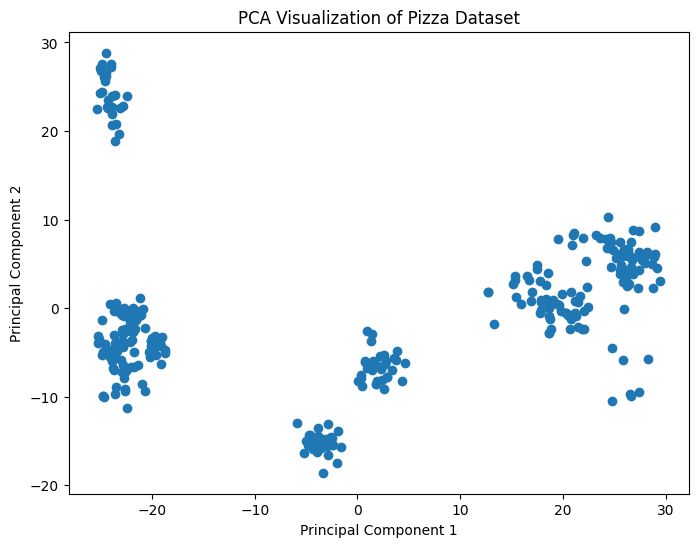

In [15]:
# Performing PCA
# We'll use the eigenvectors as the transformation matrix
index = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, index]

pca_result = np.dot(standardized_features, eigenvectors)[:,0:2]

# # Visualize PCA Results
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title("PCA Visualization of Pizza Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()



### Interpretation
The presence of seven clusters indicates that the nutrient composition of pizzas varies significantly across different brands or types. The clusters may correspond to distinct pizza categories, such as vegetarian, meat lovers, Hawaiian, thin crust, deep dish, etc. Furthermore, the proximity of data points within each cluster suggests a high degree of similarity in nutrient profiles among pizzas within the same category.

### Implications
Understanding the clustering pattern revealed by PCA can provide valuable insights for various stakeholders in the pizza industry. For pizza manufacturers, it can guide product development efforts by identifying popular nutrient profiles and flavor combinations. For consumers, it can facilitate informed decision-making by offering insights into the nutritional content of different pizza options. Additionally, for marketers and retailers, it can inform product positioning and marketing strategies based on consumer preferences and trends.

### Conclusion
In conclusion, the PCA analysis of the pizza dataset reveals significant clustering patterns in the nutrient composition of pizzas. By identifying six distinct clusters, PCA provides valuable insights into the underlying structure of the dataset and offers opportunities for data-driven decision-making in the pizza industry.


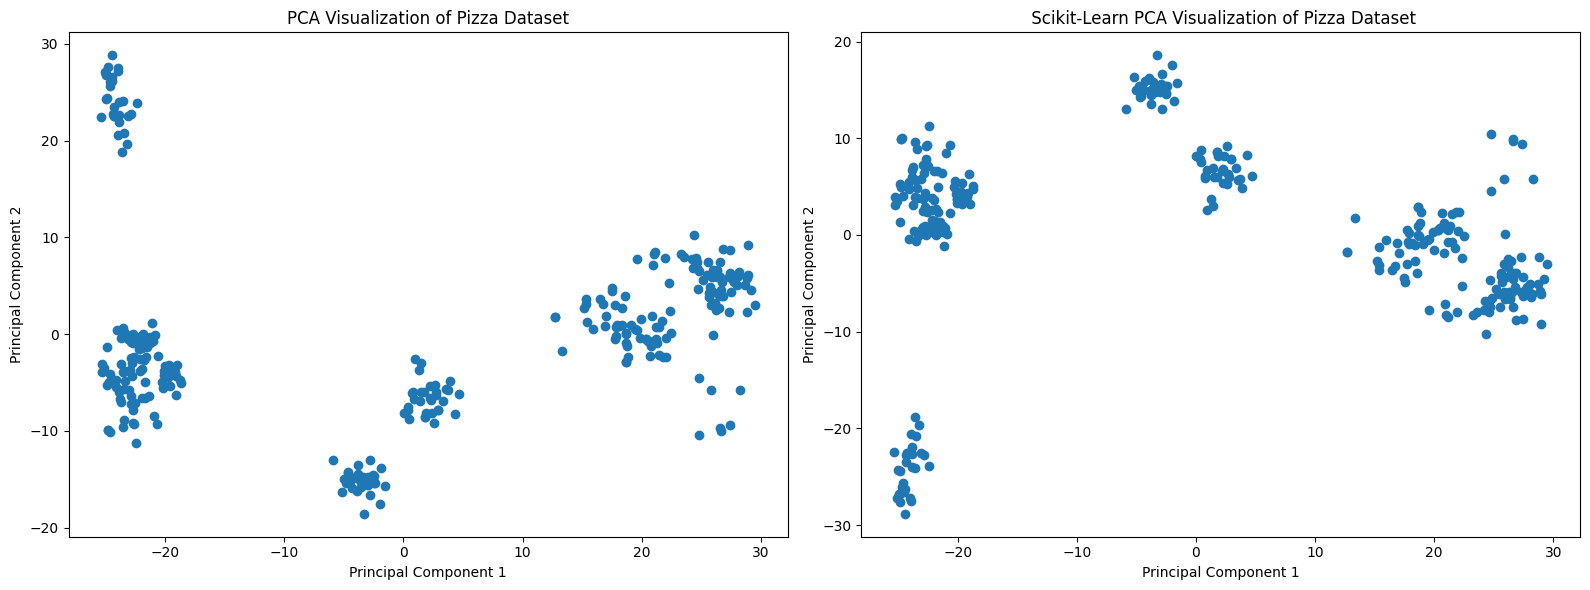

In [16]:
# Comparison to PCA with scikit-learn
pca = PCA(n_components=2)
X_pca = pca.fit_transform(numerical_features)


fig, ax = plt.subplots(1, 2, figsize=(16, 6))


ax[0].scatter(pca_result[:, 0], pca_result[:, 1])
ax[0].set_title("PCA Visualization of Pizza Dataset")
ax[0].set_xlabel("Principal Component 1")
ax[0].set_ylabel("Principal Component 2")


ax[1].scatter(X_pca[:, 0], X_pca[:, 1])
ax[1].set_title(" Scikit-Learn PCA Visualization of Pizza Dataset")
ax[1].set_xlabel("Principal Component 1")
ax[1].set_ylabel("Principal Component 2")


plt.tight_layout()


plt.show()